In [ ]:
# Bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classificador/wine.data', header=None,names=['target','Alcohol','Malic acid', 'Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
y=dataframe.iloc[0:,0]
X=dataframe.iloc[:,1:14]


# lista de classificadores
classificadores = {'KNN k=1': KNeighborsClassifier(n_neighbors=1),
                   'KNN k=3': KNeighborsClassifier(n_neighbors=3),
                   'KNN k=5': KNeighborsClassifier(n_neighbors=5),
                   'KNN k=7': KNeighborsClassifier(n_neighbors=7),
                   'DMC': LinearDiscriminantAnalysis()}

# número de rodadas
n_rodadas = 50

# listas para armazenar as acurácias e matrizes de confusão
acc_knn1 = []
acc_knn3 = []
acc_knn5 = []
acc_knn7 = []
acc_dmc = []
cm_knn1 = np.zeros((3,3))
cm_knn3 = np.zeros((3,3))
cm_knn5 = np.zeros((3,3))
cm_knn7 = np.zeros((3,3))
cm_dmc = np.zeros((3,3))

# listas para armazenar as acurácias e matrizes de confusão para o caso 2
acc_knn1_2 = []
acc_knn3_2 = []
acc_knn5_2 = []
acc_knn7_2 = []
acc_dmc_2 = []
cm_knn1_2 = np.zeros((3,3))
cm_knn3_2 = np.zeros((3,3))
cm_knn5_2 = np.zeros((3,3))
cm_knn7_2 = np.zeros((3,3))
cm_dmc_2 = np.zeros((3,3))

# loop de 50 rodadas
for i in range(n_rodadas):
    # divide os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,stratify=y)

    # retirando para caso 2
    X_train_2 = X_train.loc[:, ['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols', 'Proline', 'Hue']]
    X_test_2 = X_test.loc[:, ['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols', 'Proline', 'Hue']]
    

    # treina e testa cada classificador
    for nome, clf in classificadores.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        # armazena a acurácia e a matriz de confusão apropriada
        if nome == 'KNN k=1':
            acc_knn1.append(acc)
            cm_knn1 += cm
        elif nome == 'KNN k=3':
            acc_knn3.append(acc)
            cm_knn3 += cm
        elif nome == 'KNN k=5':
            acc_knn5.append(acc)
            cm_knn5 += cm
        elif nome == 'KNN k=7':
            acc_knn7.append(acc)
            cm_knn7 += cm
        elif nome == 'DMC':
            acc_dmc.append(acc)
            cm_dmc += cm

    # treina e testa cada classificador para o caso 2
    for nome, clf in classificadores.items():
        clf.fit(X_train_2, y_train)
        y_pred = clf.predict(X_test_2)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        # armazena a acurácia e a matriz de confusão apropriada para o caso 2
        if nome == 'KNN k=1':
            acc_knn1_2.append(acc)
            cm_knn1_2 += cm
        elif nome == 'KNN k=3':
            acc_knn3_2.append(acc)
            cm_knn3_2 += cm
        elif nome == 'KNN k=5':
            acc_knn5_2.append(acc)
            cm_knn5_2 += cm
        elif nome == 'KNN k=7':
            acc_knn7_2.append(acc)
            cm_knn7_2 += cm
        elif nome == 'DMC':
            acc_dmc_2.append(acc)
            cm_dmc_2 += cm

# calcula a média e desvio padrão das acurácias
media_knn1 = np.mean(acc_knn1)
desvio_padrao_knn1 = np.std(acc_knn1)
media_knn3 = np.mean(acc_knn3)
desvio_padrao_knn3 = np.std(acc_knn3)
media_knn5 = np.mean(acc_knn5)
desvio_padrao_knn5 = np.std(acc_knn5)
media_knn7 = np.mean(acc_knn7)
desvio_padrao_knn7 = np.std(acc_knn7)
media_dmc = np.mean(acc_dmc)
desvio_padrao_dmc = np.std(acc_dmc)

# calcula a média e desvio padrão das acurácias para o caso 2
media_knn1_2 = np.mean(acc_knn1_2)
desvio_padrao_knn1_2 = np.std(acc_knn1_2)
media_knn3_2 = np.mean(acc_knn3_2)
desvio_padrao_knn3_2 = np.std(acc_knn3_2)
media_knn5_2 = np.mean(acc_knn5_2)
desvio_padrao_knn5_2 = np.std(acc_knn5_2)
media_knn7_2 = np.mean(acc_knn7_2)
desvio_padrao_knn7_2 = np.std(acc_knn7_2)
media_dmc_2 = np.mean(acc_dmc_2)
desvio_padrao_dmc_2 = np.std(acc_dmc_2)



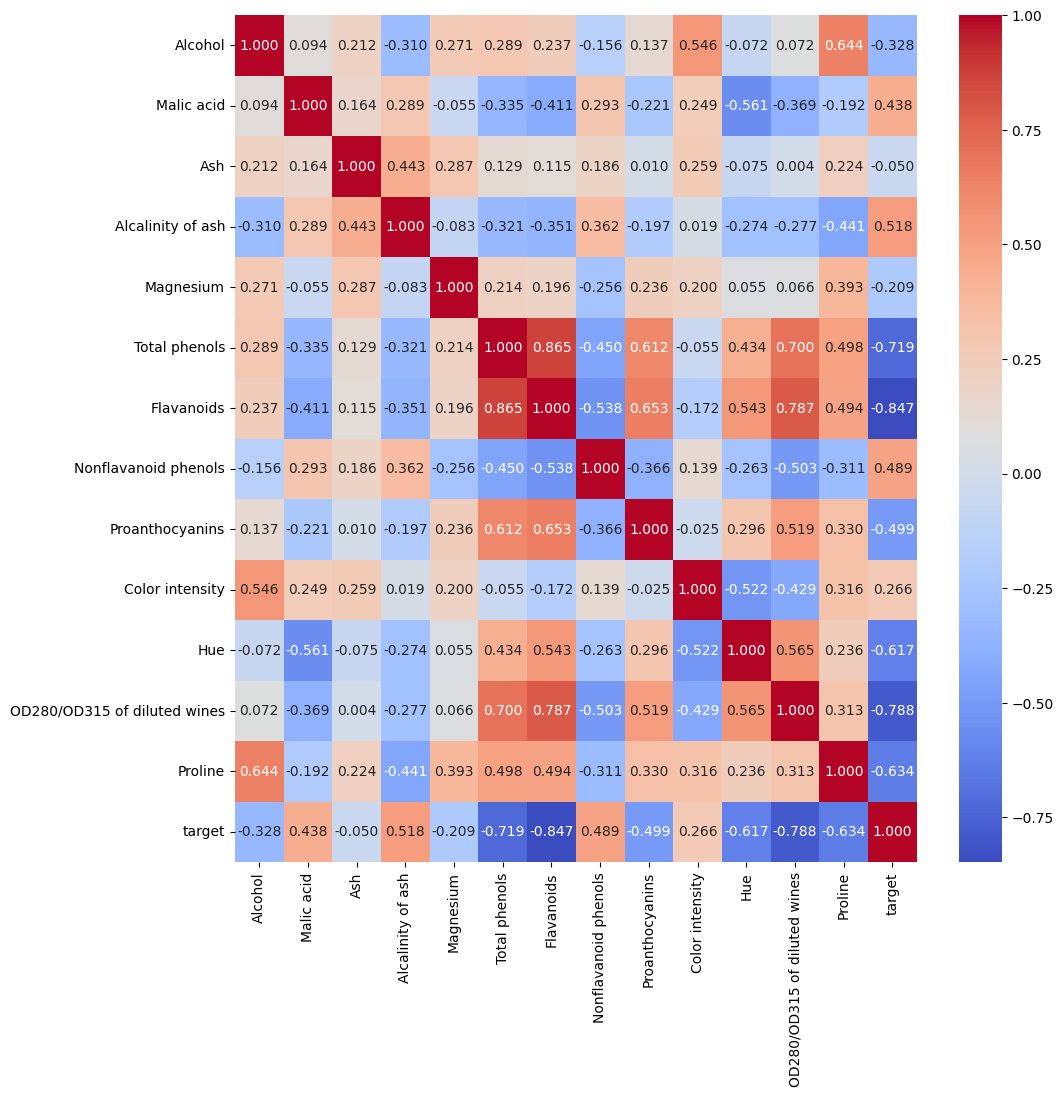

<Figure size 1000x1000 with 0 Axes>

Os dois atributos mais relevantes são:
 Flavanoids                      0.847498
OD280/OD315 of diluted wines    0.788230
Total phenols                   0.719163
Proline                         0.633717
Hue                             0.617369
Name: target, dtype: float64


In [ ]:
# coeficiente de correlação,
data = pd.concat([X, y], axis=1)
correlations = data.corr()

#print(correlations)

# Bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 11))
# criar um gráfico de calor da matriz de correlação
sns.heatmap(correlations, annot=True, cmap="coolwarm", ax=ax ,fmt=".3f")

# ajustar o tamanho do gráfico
plt.figure(figsize=(10, 10))

# mostrar o gráfico
plt.show()

# selecionando os 5 atributos mais relevantes
corr_with_target = correlations.iloc[-1][:-1] # excluindo a última coluna (target)
two_most_correlated = corr_with_target.abs().sort_values(ascending=False)[:5]
print("Os dois atributos mais relevantes são:\n", two_most_correlated)

In [ ]:
# imprime as acurácias médias e desvios padrão para o caso 1
print('\n\nKNN k=1\nAcurácia média:', media_knn1, '\nDesvio padrão:', desvio_padrao_knn1, '\n')
print('KNN k=3\nAcurácia média:', media_knn3, '\nDesvio padrão:', desvio_padrao_knn3, '\n')
print('KNN k=5\nAcurácia média:', media_knn5, '\nDesvio padrão:', desvio_padrao_knn5, '\n')
print('KNN k=7\nAcurácia média:', media_knn7, '\nDesvio padrão:', desvio_padrao_knn7, '\n')
print('DMC\nAcurácia média:', media_dmc, '\nDesvio padrão:', desvio_padrao_dmc, '\n')

# imprime as matrizes de confusão para o caso 1
print('Matriz de confusão KNN k=1:')
print(cm_knn1)
print('Matriz de confusão KNN k=3:')
print(cm_knn3)
print('Matriz de confusão KNN k=5:')
print(cm_knn5)
print('Matriz de confusão KNN k=7:')
print(cm_knn7)
print('Matriz de confusão DMC:')
print(cm_dmc)



KNN k=1
Acurácia média: 0.7416666666666666 
Desvio padrão: 0.06484787516627087 

KNN k=3
Acurácia média: 0.7016666666666665 
Desvio padrão: 0.057951128835712386 

KNN k=5
Acurácia média: 0.6916666666666665 
Desvio padrão: 0.05912165737164657 

KNN k=7
Acurácia média: 0.6955555555555556 
Desvio padrão: 0.06357653111519987 

DMC
Acurácia média: 0.9838888888888888 
Desvio padrão: 0.0201000583501395 

Matriz de confusão KNN k=1:
[[511.  42.  47.]
 [ 44. 520. 136.]
 [ 36. 160. 304.]]
Matriz de confusão KNN k=3:
[[512.  34.  54.]
 [ 69. 480. 151.]
 [ 70. 159. 271.]]
Matriz de confusão KNN k=5:
[[532.  14.  54.]
 [ 65. 484. 151.]
 [ 62. 209. 229.]]
Matriz de confusão KNN k=7:
[[540.   2.  58.]
 [ 55. 471. 174.]
 [ 62. 197. 241.]]
Matriz de confusão DMC:
[[599.   1.   0.]
 [ 11. 678.  11.]
 [  0.   6. 494.]]


In [ ]:
# imprime as acurácias médias e desvios padrão para o caso 2
print('\n\nKNN k=1\nAcurácia média_2:', media_knn1_2, '\nDesvio padrão_2:', desvio_padrao_knn1_2, '\n')
print('KNN k=3\nAcurácia média_2:', media_knn3_2, '\nDesvio padrão_2:', desvio_padrao_knn3_2, '\n')
print('KNN k=5\nAcurácia média_2:', media_knn5_2, '\nDesvio padrão_2:', desvio_padrao_knn5_2, '\n')
print('KNN k=7\nAcurácia média_2:', media_knn7_2, '\nDesvio padrão_2:', desvio_padrao_knn7_2, '\n')
print('DMC\nAcurácia média_2:', media_dmc_2, '\nDesvio padrão_2:', desvio_padrao_dmc_2, '\n')

# imprime as matrizes de confusão para o caso 2
print('Matriz de confusão KNN_2 k=1:')
print(cm_knn1_2)
print('Matriz de confusão KNN_2 k=3:')
print(cm_knn3_2)
print('Matriz de confusão KNN_2 k=5:')
print(cm_knn5_2)
print('Matriz de confusão KNN_2 k=7:')
print(cm_knn7_2)
print('Matriz de confusão DMC_2:')
print(cm_dmc_2)



KNN k=1
Acurácia média_2: 0.7477777777777778 
Desvio padrão_2: 0.06546132587402419 

KNN k=3
Acurácia média_2: 0.6972222222222223 
Desvio padrão_2: 0.06266952318154709 

KNN k=5
Acurácia média_2: 0.6844444444444445 
Desvio padrão_2: 0.056317003988774164 

KNN k=7
Acurácia média_2: 0.6877777777777777 
Desvio padrão_2: 0.051086950811434 

DMC
Acurácia média_2: 0.976111111111111 
Desvio padrão_2: 0.02422247706287961 

Matriz de confusão KNN_2 k=1:
[[521.  34.  45.]
 [ 56. 528. 116.]
 [ 31. 172. 297.]]
Matriz de confusão KNN_2 k=3:
[[523.  27.  50.]
 [ 75. 470. 155.]
 [ 70. 168. 262.]]
Matriz de confusão KNN_2 k=5:
[[544.  16.  40.]
 [ 60. 463. 177.]
 [ 58. 217. 225.]]
Matriz de confusão KNN_2 k=7:
[[553.   5.  42.]
 [ 60. 452. 188.]
 [ 62. 205. 233.]]
Matriz de confusão DMC_2:
[[594.   6.   0.]
 [ 21. 669.  10.]
 [  0.   6. 494.]]


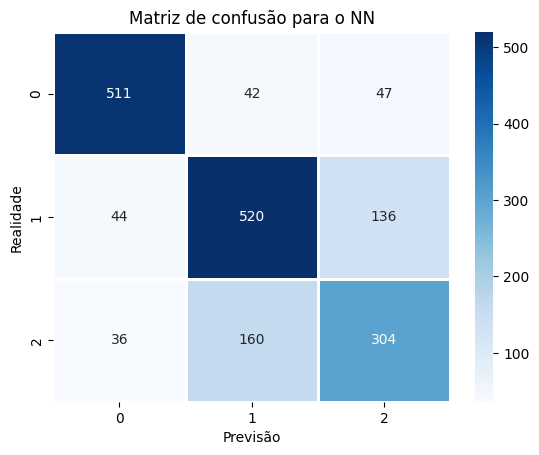

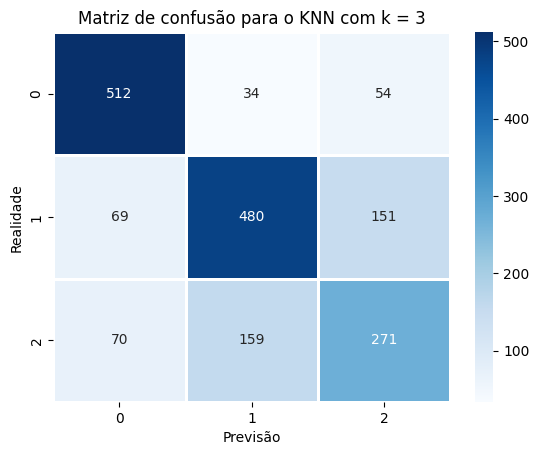

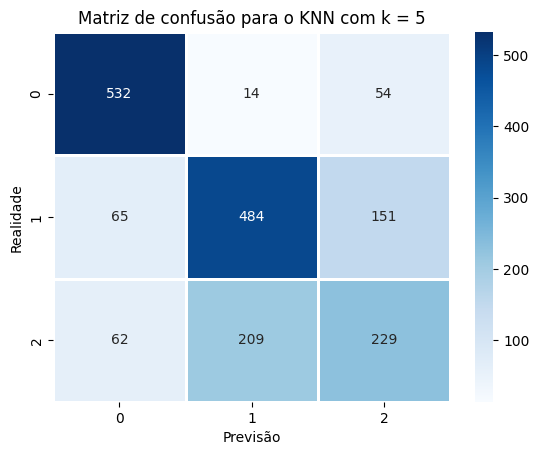

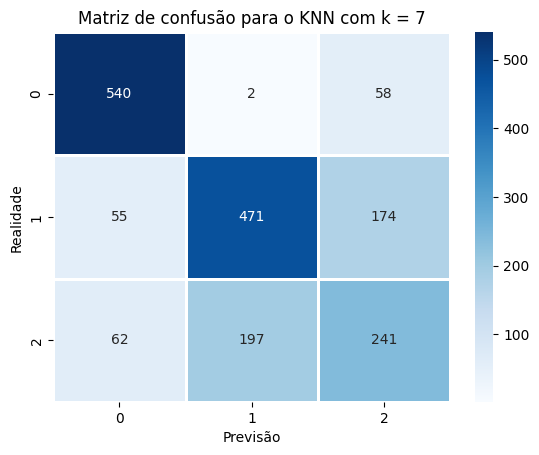

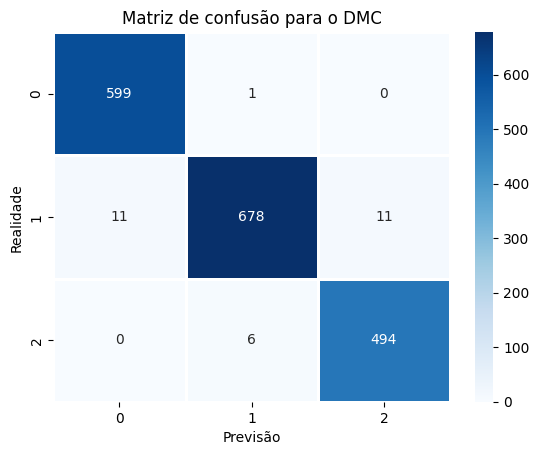

In [ ]:
# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_knn1, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o NN")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()


# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_knn3, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 3")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()



# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_knn5, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 5")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()


# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_knn7, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 7")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()

# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 1
sns.heatmap(cm_dmc, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o DMC")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()

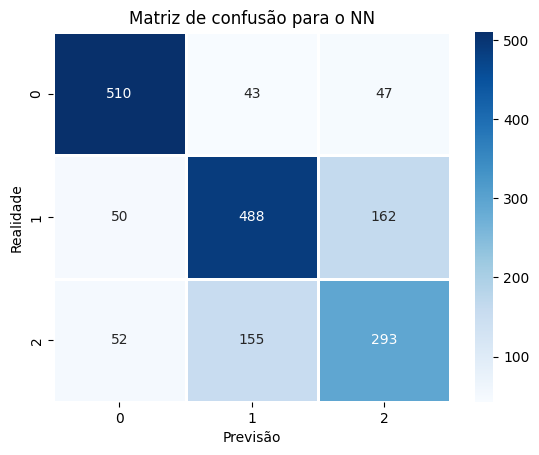

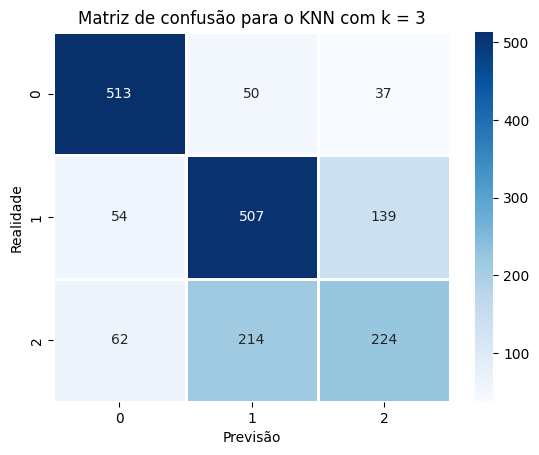

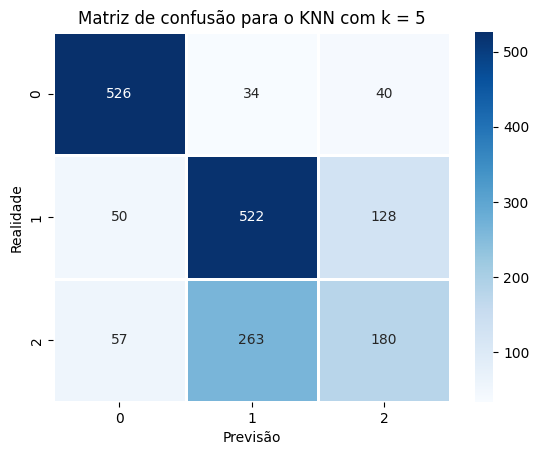

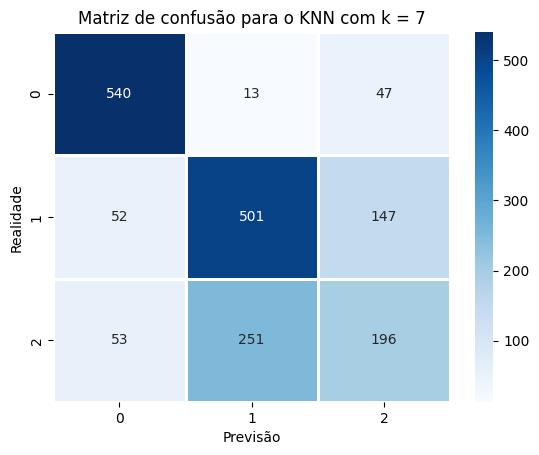

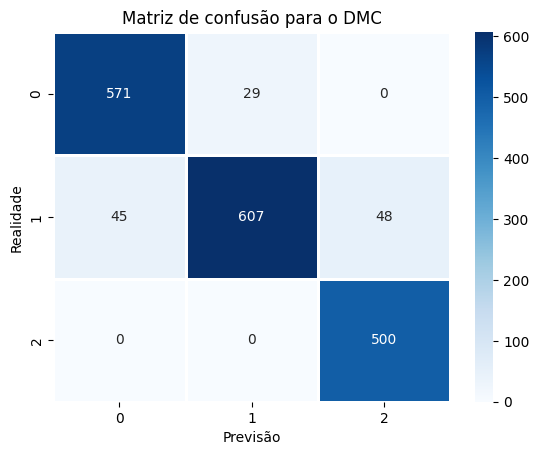

In [ ]:
# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
sns.heatmap(cm_knn1_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o NN")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()


# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
# Criando um ndarray
sns.heatmap(cm_knn3_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 3")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()



# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
sns.heatmap(cm_knn5_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f") 

plt.title("Matriz de confusão para o KNN com k = 5")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()


# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
sns.heatmap(cm_knn7_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o KNN com k = 7")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()

# Plotando a matriz de confusão usando a biblioteca seaborn para o caso 2
sns.heatmap(cm_dmc_2, annot=True, cmap="Blues", linewidths=1, fmt=".0f")

plt.title("Matriz de confusão para o DMC")
plt.xlabel("Previsão")
plt.ylabel("Realidade")
plt.show()